### Methodology
#### The expected content of the notebook:
    - Detection of time series changes in facial action units

#### Data - data frame of facial action units of James (using OpenFace for windows)

In [1]:
import sys
import os
import warnings

import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
# import CRD_functions as crd

from jmspack.NLTSA import (ts_levels, 
                           distribution_uniformity, 
                           fluctuation_intensity, 
                           complexity_resonance, 
                           complexity_resonance_diagram,
                          cumulative_complexity_peaks,
                          cumulative_complexity_peaks_plot)

from sinfo import sinfo

In [2]:
from moviepy.editor import *
import librosa
import IPython.display as ipd #so that we can listen at the audio
import librosa.display

#### Display the session info of the notebook

In [3]:
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
imageio     2.9.0
jmspack     0.0.3
librosa     0.8.1
matplotlib  3.3.4
moviepy     1.0.1
numpy       1.19.2
pandas      1.2.3
seaborn     0.11.1
sinfo       0.3.4
sklearn     0.24.2
-----
IPython             7.21.0
jupyter_client      6.1.7
jupyter_core        4.7.1
jupyterlab          3.0.11
notebook            6.3.0
-----
Python 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
16 logical CPU cores, AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
-----
Ses

In [4]:
# ========================
# PERSONAL PREFERENCES
# Set pandas output preferences
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# Set seaborn plot style
plt.style.use('seaborn')
# ========================

In [5]:
# os.getcwd()

In [6]:
# video = VideoFileClip("audio_video/must_have_missed.mp4")
# # video.ipython_display()
# audioclip = video.audio
# audioclip.write_audiofile("audio_video/must_have_missed.wav")

In [7]:
audio, sr = librosa.load('audio_video/must_have_missed.wav')
ipd.Audio(audio, rate = sr)

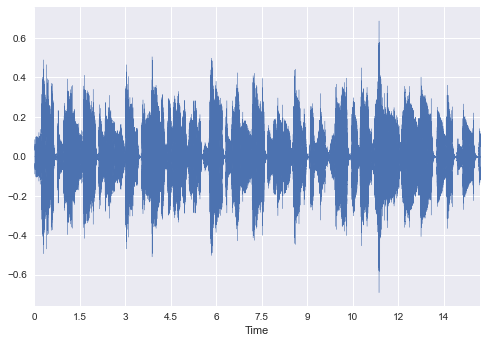

In [8]:
audio, _ = librosa.effects.trim(audio)#Trim leading and trailing #silence from an audio signal.
_ = librosa.display.waveplot(audio, sr=sr)

In [9]:
df = (pd.DataFrame(audio, columns=["amplitude"])
.reset_index()
 .assign(time = lambda d: d["index"] / sr)
 .drop("index", axis=1)
)

In [60]:
df = pd.concat(
    [pd.DataFrame(librosa.feature.mfcc(audio)).T,
pd.DataFrame(librosa.feature.fourier_tempogram(audio)).T,
pd.DataFrame(librosa.feature.rms(audio)).T],
    axis=1
         ).select_dtypes("float32")

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0
0,-292.574005,-58.621140,28.195812,15.786281,-25.280968,15.824162,-16.225826,-9.436774,4.148943,4.216001,-6.616191,5.299119,-16.156361,10.155371,1.612605,1.011522,-2.296790,17.958176,8.142595,8.041979,0.019180
1,-237.555115,-23.835186,32.702827,20.520411,-25.342417,9.581366,-17.101603,-18.577179,-2.260731,3.935304,-10.115103,2.136375,-21.431030,2.976007,5.245857,3.325969,-4.573831,12.424900,1.625535,4.425389,0.022639
2,-210.905106,36.564865,37.556576,33.538284,-8.960798,8.343014,-17.457342,-24.981892,-8.012203,3.242598,-10.747659,-1.575373,-26.957165,-8.239857,-1.284764,-3.003874,-8.332524,5.847898,-5.318460,-0.077738,0.030196
3,-223.007782,86.750999,12.500073,36.262787,9.133461,0.774870,-18.888397,-24.622728,-25.187685,0.831305,-7.031306,-5.788967,-33.948296,-9.615551,-6.356187,-4.049036,-8.254627,6.117969,-1.707569,-2.112231,0.033641
4,-226.272186,69.853302,10.699455,48.232849,2.645922,9.206131,-18.594780,-15.730539,-32.361221,-1.972478,-9.381313,-16.974018,-31.942188,-8.850260,-5.012785,-3.098676,-10.239876,5.405178,1.281785,0.467182,0.036654


In [47]:
dir(librosa.feature)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'delta',
 'fourier_tempogram',
 'inverse',
 'melspectrogram',
 'mfcc',
 'poly_features',
 'rhythm',
 'rms',
 'spectral',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_flatness',
 'spectral_rolloff',
 'stack_memory',
 'tempogram',
 'tonnetz',
 'utils',
 'zero_crossing_rate']

In [49]:
# _ = sns.lineplot(data=df, x="time", y="amplitude")

In [54]:
# df = df.set_index("time")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       634 non-null    float32
 1   1       634 non-null    float32
 2   2       634 non-null    float32
 3   3       634 non-null    float32
 4   4       634 non-null    float32
 5   5       634 non-null    float32
 6   6       634 non-null    float32
 7   7       634 non-null    float32
 8   8       634 non-null    float32
 9   9       634 non-null    float32
 10  10      634 non-null    float32
 11  11      634 non-null    float32
 12  12      634 non-null    float32
 13  13      634 non-null    float32
 14  14      634 non-null    float32
 15  15      634 non-null    float32
 16  16      634 non-null    float32
 17  17      634 non-null    float32
 18  18      634 non-null    float32
 19  19      634 non-null    float32
 20  0       634 non-null    float32
dtypes: float32(21)
memory usage: 52.2 KB


In [63]:
scaled_ts_df = pd.DataFrame(MinMaxScaler()
             .fit_transform(
                 df#.loc[1:1.01, :]
             ), 
             columns=df.columns)

In [64]:
scaled_ts_df.shape

(635, 21)

In [65]:
distribution_uniformity_df = pd.DataFrame(distribution_uniformity(scaled_ts_df, 
                                                                  win=7, 
                                                                  xmin=0, 
                                                                  xmax=1, 
                                                                  col_first=1, 
                                                                  col_last=scaled_ts_df.shape[1])
                                         )
distribution_uniformity_df.columns=scaled_ts_df.columns.tolist()

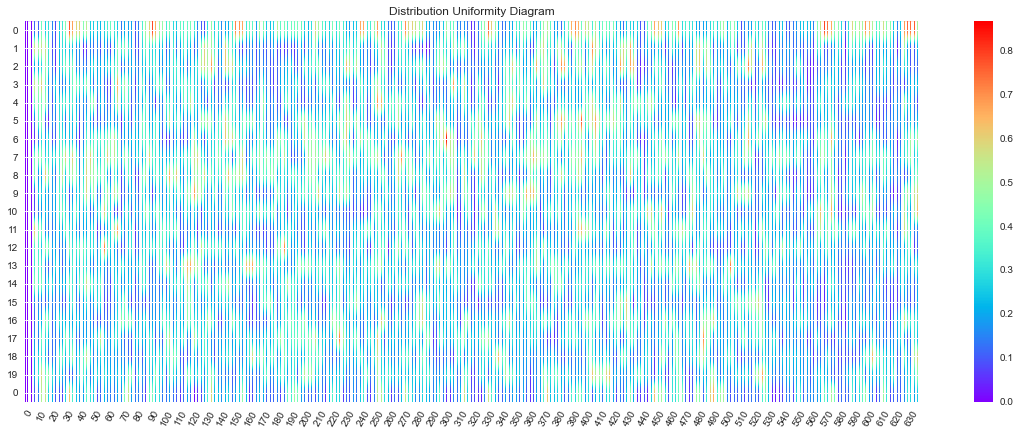

In [66]:
_ = complexity_resonance_diagram(distribution_uniformity_df,
                                plot_title='Distribution Uniformity Diagram')

In [67]:
fluctuation_intensity_df = pd.DataFrame(fluctuation_intensity(scaled_ts_df, 
                                                                  win=7, 
                                                                  xmin=0, 
                                                                  xmax=1, 
                                                                  col_first=1, 
                                                                  col_last=scaled_ts_df.shape[1])
                                         )
fluctuation_intensity_df.columns=scaled_ts_df.columns.tolist()

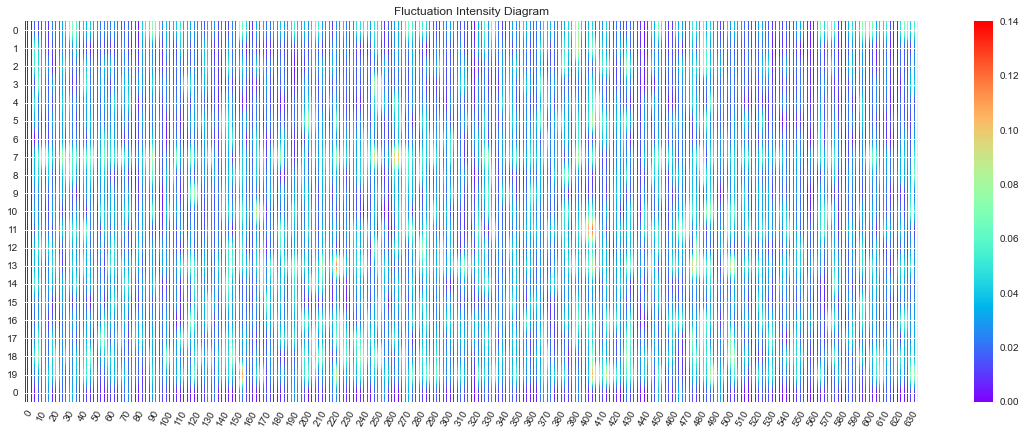

In [68]:
_ = complexity_resonance_diagram(fluctuation_intensity_df,
                                plot_title='Fluctuation Intensity Diagram')

In [69]:
complexity_resonance_df = complexity_resonance(distribution_uniformity_df, fluctuation_intensity_df)

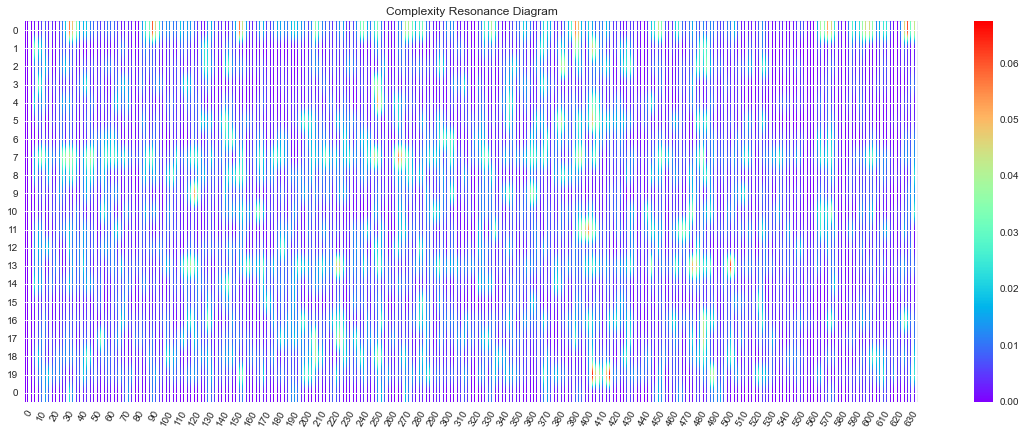

In [70]:
_ = complexity_resonance_diagram(complexity_resonance_df)

In [71]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [73]:
# cmap=sns.diverging_palette(5, 250, as_cmap=True)

# (complexity_resonance_df
#  .loc[0:100,:]
#  .T
#  .style.background_gradient(cmap, axis=1)
#     .set_properties(**{'max-width': '180px', 'font-size': '5pt'})
#     .set_caption("Complexity Resonance Df (Hover to magnify)")
#     .set_precision(2)
#     .set_table_styles(magnify())
# )

In [74]:
cumulative_complexity_peaks_df, significant_peaks_df = cumulative_complexity_peaks(df=complexity_resonance_df)

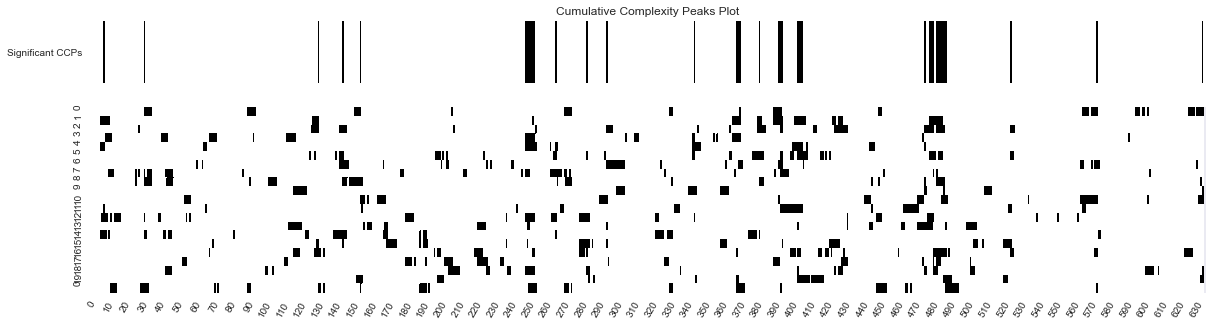

In [75]:
_ = cumulative_complexity_peaks_plot(cumulative_complexity_peaks_df=cumulative_complexity_peaks_df,
                                    significant_peaks_df=significant_peaks_df,
                                )

## Ts_levels example feature

In [78]:
example_feature = scaled_ts_df.columns[2]

In [79]:
ts_levels_df, fig, ax = ts_levels(ts=scaled_ts_df[example_feature], 
                                  ts_x=None, 
                                  criterion="mse", 
                                  max_depth=10, 
                                  min_samples_leaf=15,
                                  min_samples_split=2, 
                                  max_leaf_nodes=30, 
                                  plot=True, 
                                  equal_spaced=True, 
                                  n_x_ticks=10)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Plot all of the time series levels of the FACS

In [80]:
all_ts_levels = pd.DataFrame()

for column in scaled_ts_df.columns.tolist():
    ts_levels_df, fig, ax = ts_levels(ts=scaled_ts_df[column], 
                                  ts_x=None, 
                                  criterion="mse", 
                                  max_depth=10, 
                                  min_samples_leaf=15,
                                  min_samples_split=2, 
                                  max_leaf_nodes=30, 
                                  plot=False, 
                                  equal_spaced=True, 
                                  n_x_ticks=10)
    _ = ts_levels_df.set_index("t_steps", inplace=True)
    ts_levels_df.columns = [f"{column[1:]}_{x}" for x in ts_levels_df.columns.tolist()]
    all_ts_levels = pd.concat([all_ts_levels, ts_levels_df], axis=1)

ValueError: ts is not one-dimensional

In [ ]:
plot_df = (all_ts_levels
           .reset_index()
           .melt(id_vars="t_steps"))

In [ ]:
plt.figure(figsize=(30, 10))
ax = sns.lineplot(x="t_steps", 
                  y="value",
                  hue="variable", 
                  palette="gist_rainbow",
                  data=plot_df[plot_df["variable"].str.contains("original_ts")],
                  legend=False,
                  linestyle='dashed',
                 )
ax = sns.lineplot(x="t_steps", 
                  y="value",
                  hue="variable", 
                  palette="gist_rainbow",
                  data=plot_df[plot_df["variable"].str.contains("ts_levels")],
                 )
_ = ax.set(xlabel='Time steps', ylabel='Facial Action Units', 
           title='Different facial action units ts-levels')